### HW3 - Question 5 ###
5.	Similar but revised problem as Inman Example 2.4.1 and Inman Problem 2.46 but using values from Quiz#1.   Consider a car of mass, m = 1000 kg (assume vehicle mass and one passenger), suspension damping coefficient, c=2000 kg/s, and stiffness, k = 10,000 N/m.  Write a program in Matlab or Python to solve for the displacement from static equilibrium as a function of vehicle speed on one plot and as a function of driving frequency in rad/s on another plot. 

To be clear, plot two plots each with two curves (plot two different vehicle weights on each plot).  For one plot, plot the displacements of x1 and x2 for varying vehicle speeds (use units of km/hr) both for m=1000 kg and for another with three extra passengers (total passengers) of each 80 kg weight (extra 240 kgs total), i.e, m+mp=1240 kg as a function of vehicle speed (km/hr), and the other plot as a function of driving frequency in rad/s.  Clearly label your plots (use markers) and include units.  Create a table showing the displacements for one and four passengers at 20, 60, 80, 100, and 140 km/hr.  In your table show as Inman did in Table 2.1 the driving frequency corresponding to each speed. 

 Use the same road surface inputs in Inman Example 2.4.1. and in the figure below (the peak-to-peak amplitude of the road surface is 0.02 m and the distance between the bumps is 6 m). Pick one speed and mass and verify the displacement value from your program with hand calculations.  


In [16]:
# setting variables 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

m_car = 1000 # kg 
m_passenger = 80 # kg 
m1 = m_car 
m2 = m_car + 3*m_passenger 

c = 2000 #kg/s 
k = 10000 # N/m 
Y = 0.01 # m

#### Parametric calculation with Pandas Dataframe #### 

In [24]:
df1 = pd.DataFrame(columns = ['v','wb','r1', 'r2','x1', 'x2'])
#Mass-dependent variables
wn1 = np.sqrt(k/m1)
wn2 = np.sqrt(k/m2)
zeta1 = c/np.sqrt((2*m1*k))
zeta2 = c/np.sqrt((2*m2*k))
print("natural frequency of car:", wn1, "\nnatural frequency of car with :", wn2, '\ndaming ratio of car:', zeta1,'\ndamping ratio of car with passengers:', zeta2)

df1['v'] = [20, 60, 80, 100, 140]
df1['wb'] = 0.2909*df1['v']
df1['r1'] = df1['wb']/wn1
df1['r2'] = df1['wb']/wn2
df1['x1'] = Y * np.sqrt((1 + (2 * zeta1 * df1['r1'])**2)/((1-df1['r1']**2)**2 + (2*zeta1*df1['r1'])**2))
df1['x2'] = Y * np.sqrt((1 + (2 * zeta2 * df1['r2'])**2)/((1-df1['r2']**2)**2 + (2*zeta2*df1['r2'])**2))

natural frequency of car: 3.1622776601683795 
natural frequency of car with : 2.839809171235324 
daming ratio of car: 0.4472135954999579 
damping ratio of car with passengers: 0.4016096644512494


,v,wb,r1,r2,x1,x2
0,20,5.818,1.839813,2.048729,0.006646,0.005355
1,60,17.454,5.519439,6.146188,0.001686,0.001357
2,80,23.272,7.359253,8.194917,0.001243,0.001001
3,100,29.090,9.199066,10.243646,0.000986,0.000795
4,140,40.726,12.878692,14.341104,0.000700,0.000564


#### PLOTTING ####

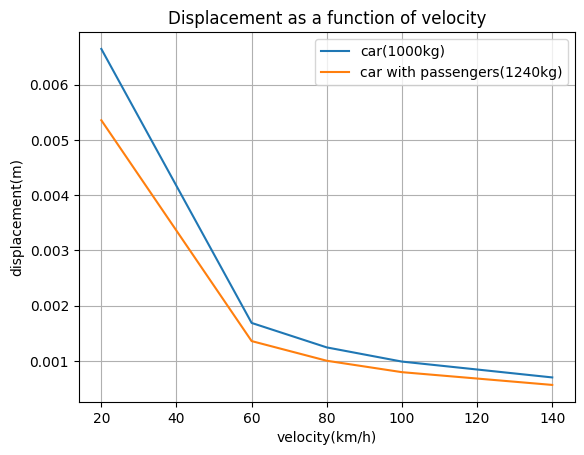

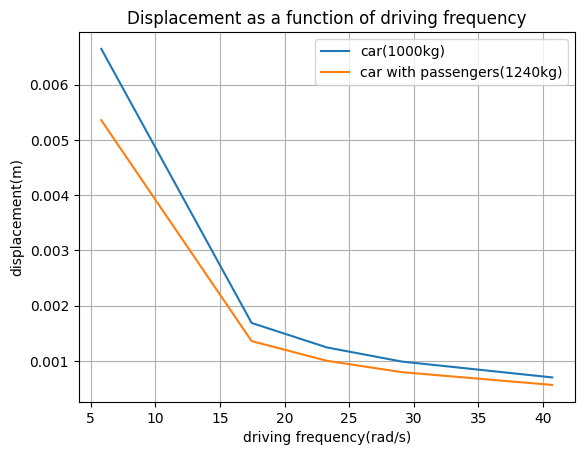

In [32]:

plt.plot(df1['v'], df1['x1'], label='car(1000kg)')
plt.plot(df1['v'], df1['x2'], label='car with passengers(1240kg)')
plt.xlabel('velocity(km/h)')
plt.ylabel('displacement(m)')
plt.title('Displacement as a function of velocity')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

plt.plot(df1['wb'], df1['x1'], label='car(1000kg)')
plt.plot(df1['wb'], df1['x2'], label='car with passengers(1240kg)')
plt.xlabel('driving frequency(rad/s)')
plt.ylabel('displacement(m)')
plt.title('Displacement as a function of driving frequency')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

#### NUMERICAL TABLE ####

In [33]:
display(df1)

,v,wb,r1,r2,x1,x2
0,20,5.818,1.839813,2.048729,0.006646,0.005355
1,60,17.454,5.519439,6.146188,0.001686,0.001357
2,80,23.272,7.359253,8.194917,0.001243,0.001001
3,100,29.090,9.199066,10.243646,0.000986,0.000795
4,140,40.726,12.878692,14.341104,0.000700,0.000564
